In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib

plt.style.use('bmh')

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

def save_fig(name, width='8cm', height='8cm'):
    fig = plt.gcf()
    tikzplotlib_fix_ncols(fig)

    tikzplotlib.clean_figure()
    tikzplotlib.save(name + '.tex', axis_width=width, axis_height=height)

In [19]:
# constante diverses
masse_corde = 4e-3 # kg
longueur_corde = 2.638 # m
longueur_vibrante = 1.475 # m
mu = masse_corde / longueur_corde # kg/m
print(mu)

0.001516300227445034


In [3]:
# importation des données
# du fichier xlsx tp_onde.xlsx
# la premiere colonne est la masse du contrepoids en gramme
# la 3eme colonne est la fréquence de résonance en Hz
# la 4e le nombre de ventre
# la 5e la longueur d'onde en m

data = pd.read_excel('tp_onde.xlsx', header=0, usecols=[0, 2, 3, 4])
data.columns = ['m', 'f', 'n', 'lamb']
data['m'] = data['m'] / 1000 # conversion en kg
data

,m,f,n,lamb
0,0.11,45.65,5,0.590
1,0.11,64.22,7,0.425
2,0.11,26.26,3,1.010
3,0.11,56.06,6,0.480
4,0.06,34.00,5,0.585
5,0.06,45.46,7,0.450
6,0.16,57.09,5,0.587
7,0.16,78.04,7,0.420
8,0.21,64.06,5,0.565
9,0.21,90.00,7,0.410


In [4]:
# calcul de la tension
data['T'] = data['m'] * 9.81

In [5]:
# calcul de la vitesse de propagation
data['v'] = data['f'] * data['lamb']

In [6]:
# calcul de la vitesse via la tension et mu
data['v2'] = np.sqrt(data['T'] / mu)

In [7]:
# calcul de la longueur d'onde via le mode et la longueur vibrante
data['lamb2'] = 2 * longueur_vibrante / data['n']

In [8]:
# calcul de la vitesse via la longueur d'onde et la fréquence
data['v3'] = data['f'] * data['lamb2']

In [9]:
data

,m,f,n,lamb,T,v,v2,lamb2,v3
0,0.11,45.65,5,0.590,1.0791,26.93350,26.677077,0.590000,26.933500
1,0.11,64.22,7,0.425,1.0791,27.29350,26.677077,0.421429,27.064143
2,0.11,26.26,3,1.010,1.0791,26.52260,26.677077,0.983333,25.822333
3,0.11,56.06,6,0.480,1.0791,26.90880,26.677077,0.491667,27.562833
4,0.06,34.00,5,0.585,0.5886,19.89000,19.702327,0.590000,20.060000
5,0.06,45.46,7,0.450,0.5886,20.45700,19.702327,0.421429,19.158143
6,0.16,57.09,5,0.587,1.5696,33.51183,32.173766,0.590000,33.683100
7,0.16,78.04,7,0.420,1.5696,32.77680,32.173766,0.421429,32.888286
8,0.21,64.06,5,0.565,2.0601,36.19390,36.859679,0.590000,37.795400
9,0.21,90.00,7,0.410,2.0601,36.90000,36.859679,0.421429,37.928571


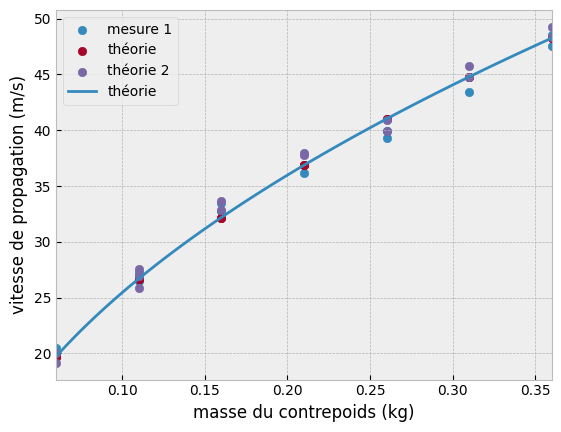

In [10]:
# grapher la vitesse de propagation en fonction de la masse du contrepoids
# ainsi que la courbe théorique : v = sqrt(m*g/mu)
plt.scatter(data['m'], data['v'], label='mesure 1')
plt.scatter(data['m'], data['v2'], label='théorie')
plt.scatter(data['m'], data['v3'], label='théorie 2')

func_th = lambda x: np.sqrt(x * 9.81 / mu)
x = np.linspace(min(data['m']), max(data['m']), 100)
plt.plot(x, func_th(x), label='théorie')

plt.xlim(min(data['m']), max(data['m']))

plt.xlabel('masse du contrepoids (kg)')
plt.ylabel('vitesse de propagation (m/s)')
plt.legend()
plt.show()

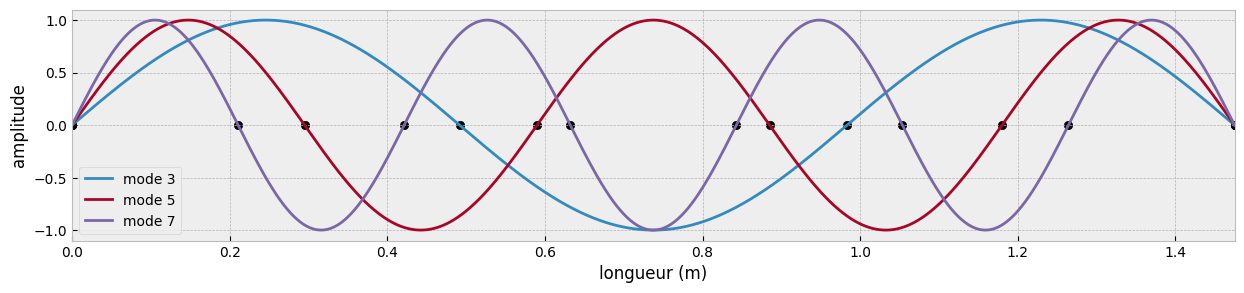

In [11]:
# grapher la fonction sinus pour les modes 3, 5, 7

# fonction sinus
func_sin = lambda z, n: np.sin(n * np.pi * z / longueur_vibrante)

length = np.linspace(0, longueur_vibrante, 1000)

plt.figure(figsize=(15, 3))

plt.plot(length, func_sin(length, 3), label='mode 3')
plt.plot(length, func_sin(length, 5), label='mode 5')
plt.plot(length, func_sin(length, 7), label='mode 7')

# ajoute un point sur chaque noeud
noeud = [lambda n: n * longueur_vibrante / 3,
         lambda n: n * longueur_vibrante / 5,
         lambda n: n * longueur_vibrante / 7]

for i in range(3):
    for j in range(0, 8):
        plt.scatter(noeud[i](j), 0, color='black')

plt.xlim(0, longueur_vibrante)
plt.xlabel('longueur (m)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

In [12]:
# write data in a file
# ready to be used in latex table
# and the values are rounded to 3 decimals in scientific notation
with open('output.txt', 'w+') as f:
    f.write(data.to_latex(float_format='%.3e', index=False))

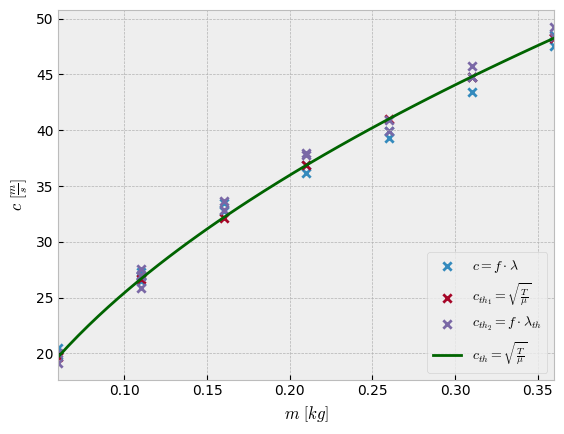

In [17]:
plt.scatter(data['m'], data['v'], label=r'$c = f \cdot \lambda$', marker='x')
plt.scatter(data['m'], data['v2'], label=r'$c_{th_1} = \sqrt{\frac{T}{\mu}}$', marker='x')
plt.scatter(data['m'], data['v3'], label=r'$c_{th_2} = f \cdot \lambda_{th}$', marker='x')

func_th = lambda x: np.sqrt(x * 9.81 / mu)
x = np.linspace(min(data['m']), max(data['m']), 100)
plt.plot(x, func_th(x), label=r'$c_{th} = \sqrt{\frac{T}{\mu}}$', color='darkgreen')

plt.xlim(min(data['m']), max(data['m']))

plt.xlabel(r'$m \ \left[kg\right]$')
plt.ylabel(r'$c \ \left[\frac{m}{s}\right]$')
# plot the legend in the bottom right corner
plt.legend(loc='lower right')
save_fig('mes_vit')

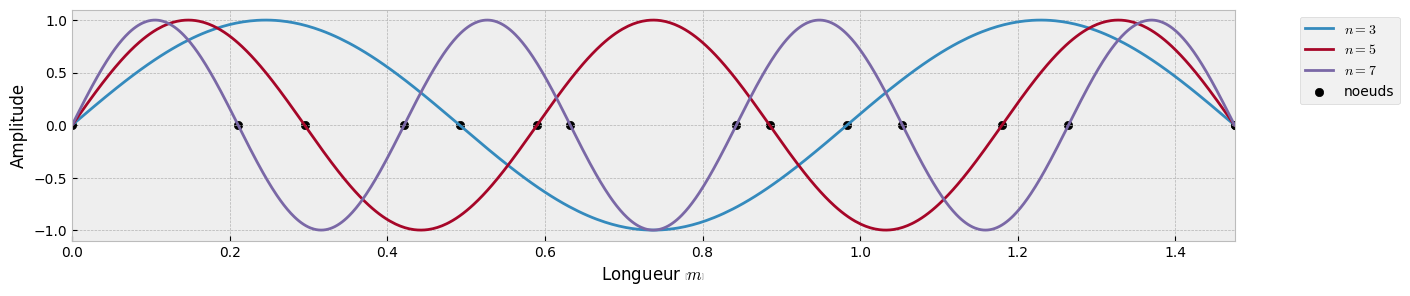

In [14]:
plt.figure(figsize=(15, 3))

plt.plot(length, func_sin(length, 3), label=r'$n=3$')
plt.plot(length, func_sin(length, 5), label=r'$n=5$')
plt.plot(length, func_sin(length, 7), label=r'$n=7$')

# ajoute un point sur chaque noeud
noeud = [lambda n: n * longueur_vibrante / 3,
         lambda n: n * longueur_vibrante / 5,
         lambda n: n * longueur_vibrante / 7]

arr_noeud = []
zero = []
for i in range(3):
    for j in range(0, 8):
        if noeud[i](j) <= longueur_vibrante:
            arr_noeud.append(noeud[i](j))
            zero.append(0)

plt.scatter(arr_noeud, zero, color='black', label='noeuds')

plt.xlim(0, longueur_vibrante)
plt.xlabel(r'Longueur $\left[m\right]$')
plt.ylabel('Amplitude')
# plot the legend outside the plot, right of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
save_fig('waves', width='15cm', height='3cm')